# Pymaceuticals Inc.
---

### Analysis

- As mentioned in the instruction, the purpose of this study was to compare the performance of the drug Capomulin's treatment, against the other treatment regimens. Among all the regimens in the study, Capomulin, Ramicane, Infubinol, and Ceftamin are the most promising treatments.

- At first glance at the Summary Statistics section, we can see that the average tumor volume under the treatments Capomulin and Ramicane is significantly lower than under the other treatments. And both treatments have smaller Tumor Volume SEM (Standard Error of the Mean), indicating that their sampe mean estimates are more precise of the population mean. These findings may imply that Capomulin and Ramicane are more effective in treating the squamous cell carcinoma compared to the other treatments in this study.

- In the Boxplots section, we focus on analyzing the final tumor volume data for the top four drug regimens. It is obvious that Capomulin and Ramicane treatments result in much lower final tumor volume compared to Infubinol and Ceftamin. Also, only one outlier was found under Infubinol treatment, suggesting that the study's data and results are less likely to be distorted. Especially, no outliers were found among Capomulin data, which is the company's drug of interest. 

- In the Line and Scatter Plots section, we focus on the data associated with Capomulin treatments and generate a line plot of tumor volume versus time point for a randomply selected mouse that received Capomulin treatment. The line plot show a trend where the tumor volume slightly increases right before each tumor volume drop. Over time, we could find that the tumor volume decreases.  

- In this analysis, we didn't utilize the mouse's age data. To determine whether age is a factor affecting the treatment results, we could also conduct analysis to check the corrlation between the mouse's age and the average tumor volume.

In [345]:
# Dependencies and Setup
# Added numpy and linregress module for later use 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(study_results, mouse_metadata, on='Mouse ID', how='inner')

# Display the data table for preview
merged_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [346]:
# Checking the number of mice.
number_of_mice = len(merged_df['Mouse ID'].unique())
number_of_mice

249

In [347]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates = merged_df[merged_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicates_ID = duplicates['Mouse ID'].unique()
duplicates_ID


array(['g989'], dtype=object)

In [348]:
# Optional: Get all the data for the duplicate mouse ID.
duplicatesid_data = merged_df[merged_df['Mouse ID'].isin(duplicates_ID)]
duplicatesid_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [349]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = merged_df[~merged_df['Mouse ID'].isin(duplicates_ID)]

# Create a copy of the cleaned raw data for later use to keep cleaned raw data from possibly being contaminated.
cleaned_df_copy = cleaned_df.copy()
cleaned_df_copy

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [350]:
# Checking the number of mice in the clean DataFrame.
number_of_mice = len(cleaned_df_copy['Mouse ID'].unique())
number_of_mice

248

## Summary Statistics

In [351]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
regimen_grp = cleaned_df_copy.groupby(['Drug Regimen'])
regimen_mean = regimen_grp['Tumor Volume (mm3)'].mean()
regimen_median = regimen_grp['Tumor Volume (mm3)'].median()
regimen_variance = regimen_grp['Tumor Volume (mm3)'].var()
regimen_standard_deviation = regimen_grp['Tumor Volume (mm3)'].std()
regimen_sem = regimen_grp['Tumor Volume (mm3)'].sem()

summary_statistics = pd.DataFrame({'Tumor Volume Mean': regimen_mean, 'Tumor Volume Median': regimen_median,\
                                   'Tumor Volume Variance': regimen_variance, 'Tumor Volume Std. Dev.': regimen_standard_deviation,\
                                   'Tumor Volume SEM': regimen_sem                                   
                                   })
summary_statistics


,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

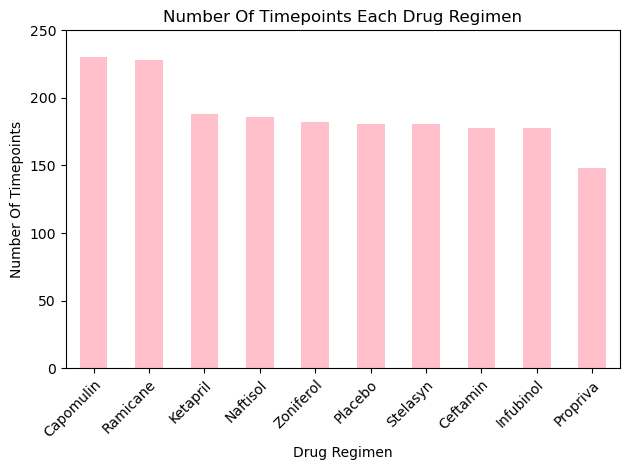

In [352]:
# Generate a bar plot showing the total number of timepoints for each drug regimen using Pandas.
number_of_timepoint = regimen_grp['Timepoint'].count().sort_values(ascending=False)
regimen_bar = number_of_timepoint.plot(kind='bar', facecolor = 'pink', title='Number Of Timepoints Each Drug Regimen',\
                            xlabel='Drug Regimen', ylabel= 'Number Of Timepoints')


# Configure x-tick rotation
xticklabels = number_of_timepoint.index
regimen_bar.set_xticklabels(xticklabels, rotation= 45, ha= 'right', wrap= True)
regimen_bar.set_ylim(0, number_of_timepoint.max()+20)
plt.tight_layout()
plt.show()

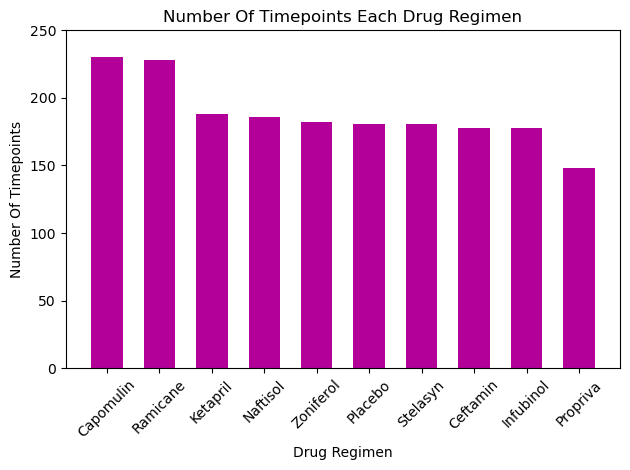

In [353]:
# Generate a bar plot showing the total number of timepoints for each drug regimen using pyplot.
# Set x axis and tick locations
x_axis = np.arange(len(number_of_timepoint))
tick_locations = [x for x in x_axis]
plt.bar(x_axis, number_of_timepoint, color= (0.7, 0, 0.6), align='center', width= 0.6)
plt.xticks(tick_locations, number_of_timepoint.index, rotation= 45)
plt.title('Number Of Timepoints Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number Of Timepoints')
plt.ylim(0, number_of_timepoint.max()+20)
plt.tight_layout()
plt.show()

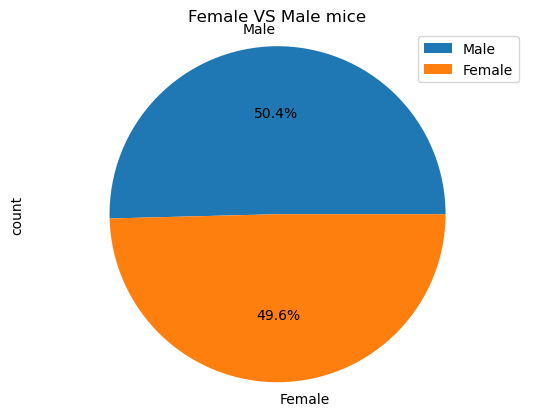

In [354]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Extract needed columns 'Mouse ID' and 'Sex' from the copy of original DataFrame
mice_gender_df = cleaned_df_copy[['Mouse ID', 'Sex']]

# Drop duplicate rows based on column 'Mouse ID' to get the unique mice with their gender
unique_mice_gender = mice_gender_df.drop_duplicates(subset='Mouse ID')

# Get counts of female and male mice used in the study
gender_count = unique_mice_gender['Sex'].value_counts()

# Make the pie chart using Pandas
gender_pie = gender_count.plot(kind='pie', autopct= '%1.1f%%', legend= True, title= 'Female VS Male mice')
plt.axis('equal')
plt.show()

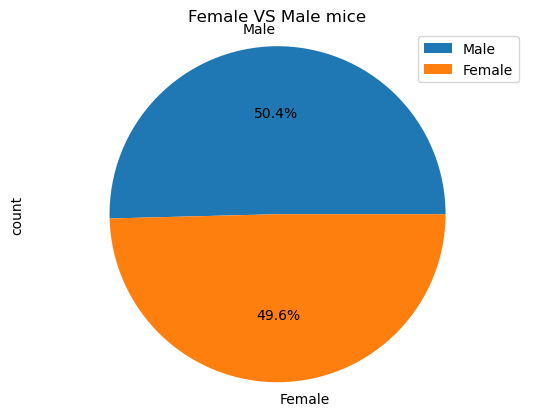

In [355]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Make the pie chart using pyplot
labels = gender_count.index
plt.pie(gender_count, labels=labels, autopct= '%1.1f%%')
plt.title('Female VS Male mice')
plt.legend(labels, loc='best')
plt.ylabel('count')
plt.axis('equal')
plt.show()


## Quartiles, Outliers and Boxplots

In [356]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
mice_id_grp = cleaned_df_copy.groupby('Mouse ID')
max_timepoint = mice_id_grp['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint_df = pd.merge(cleaned_df_copy, max_timepoint, on=['Mouse ID', 'Timepoint']).reset_index(drop=True)
last_timepoint_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,f932,0,45.000000,0,Ketapril,Male,15,29
1,x336,0,45.000000,0,Naftisol,Female,4,29
2,h428,0,45.000000,0,Ketapril,Female,1,27
3,v199,0,45.000000,0,Naftisol,Female,17,29
4,o848,0,45.000000,0,Stelasyn,Female,14,27
...,...,...,...,...,...,...,...,...
243,r944,45,41.581521,2,Capomulin,Male,12,25
244,u364,45,31.023923,3,Capomulin,Male,18,17
245,p438,45,61.433892,1,Ceftamin,Female,11,26
246,x773,45,58.634971,4,Placebo,Female,21,30


In [357]:
# Put treatments into a list for for loop (and later for plot labels)
regimen_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for regimen in regimen_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    regimen_rows = last_timepoint_df.loc[last_timepoint_df['Drug Regimen'] == regimen,:]
    
    # Store the tumor volumes associated to the regimen to the empty list
    tumor_volume_list.append(regimen_rows['Tumor Volume (mm3)'])
    
    # Determine outliers using upper and lower bounds
    quartiles = regimen_rows['Tumor Volume (mm3)'].quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers_df = regimen_rows.loc[(regimen_rows['Tumor Volume (mm3)'] < lower_bound) | (regimen_rows['Tumor Volume (mm3)'] > upper_bound), :]
    outliers = outliers_df['Tumor Volume (mm3)']
    
    # To display the interquartile range (IQR) and the outliers
    print(f"{regimen}'s IQR is {round(iqr,5)}, lower bound is {round(lower_bound,5)} and upper bound is {round(upper_bound,5)}")
    print(f"{regimen}'s potential outliers: {outliers}")
    print('')


Capomulin's IQR is 7.78186, lower bound is 20.70456 and upper bound is 51.83202
Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Ramicane's IQR is 9.09854, lower bound is 17.91266 and upper bound is 54.30681
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Infubinol's IQR is 11.47714, lower bound is 36.8329 and upper bound is 82.74145
Infubinol's potential outliers: 20    36.321346
Name: Tumor Volume (mm3), dtype: float64

Ceftamin's IQR is 15.57775, lower bound is 25.35545 and upper bound is 87.66646
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)



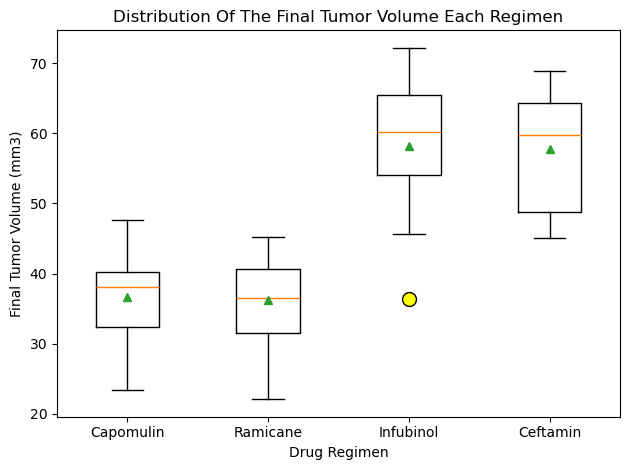

In [358]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
fig, ax1 = plt.subplots()
ax1.boxplot(tumor_volume_list, showmeans= True, tick_labels= regimen_list, flierprops= dict(marker='o', markeredgecolor='black', markerfacecolor='yellow', markersize=10))
ax1.set_title('Distribution Of The Final Tumor Volume Each Regimen')
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
plt.tight_layout()
plt.show()


## Line and Scatter Plots

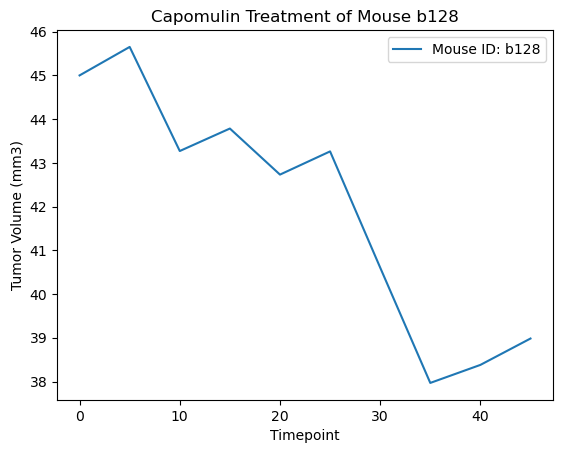

In [359]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Retrieve the data only associated to the Campulin treatment from the original data
capomulin_data = cleaned_df_copy.loc[cleaned_df_copy['Drug Regimen'] == 'Capomulin']

# I displayed the capomulin_data and selected the Mouse ID 'b128' as the object to make line plot
b128_data = capomulin_data.loc[capomulin_data['Mouse ID'] == 'b128']
x_axis = b128_data['Timepoint']
y_axis = b128_data['Tumor Volume (mm3)']
plt.plot(x_axis, y_axis, label='Mouse ID: b128')
plt.title('Capomulin Treatment of Mouse b128')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.legend(loc='best')
plt.show()

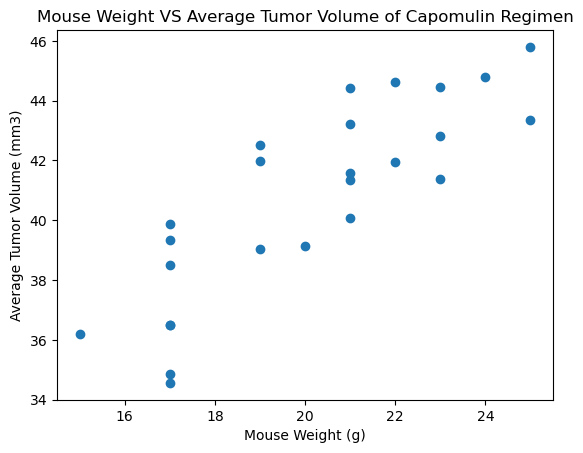

In [360]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Start with grouping capomulin_data by column 'Mouse ID' to extract each mouse's weight and the average observed tumor volume
mouse_grp = capomulin_data.groupby('Mouse ID')

# Get the average observed tumor volume for each mouse, and apply same method to extract each mouse's weight
weight_tumorvolume = mouse_grp[['Weight (g)', 'Tumor Volume (mm3)']].mean()

# Make a scatter plot
mouse_weight = weight_tumorvolume['Weight (g)']
average_tumorvolume = weight_tumorvolume['Tumor Volume (mm3)']
plt.scatter(mouse_weight, average_tumorvolume)
plt.title('Mouse Weight VS Average Tumor Volume of Capomulin Regimen')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

The corrlation between mouse weight and the average tumor volume is 0.84


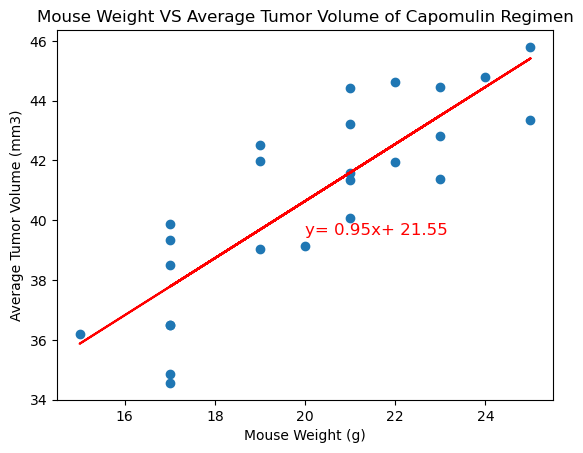

In [361]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(mouse_weight, average_tumorvolume)
print(f'The corrlation between mouse weight and the average tumor volume is {round(correlation[0],2)}')


(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight, average_tumorvolume)
regress_values = mouse_weight * slope + intercept
line_equation = "y= " + str(round(slope,2))+ "x+ " +str(round(intercept,2))

plt.scatter(mouse_weight, average_tumorvolume)
plt.plot(mouse_weight, regress_values, "r-")
plt.annotate(line_equation, (20,39.5), fontsize=12, color='r')
plt.title('Mouse Weight VS Average Tumor Volume of Capomulin Regimen')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
